In [ ]:
# Hafizh Mulya H. - 18117030
# Update: 20 Agustus 2021
# Tugas Mata Kuliah II4035 Sistem Cerdas
# Decision Tree untuk deteksi/penentuan kriteria diabetes
# Juga tersedia di https://colab.research.google.com/drive/1rTmqJFyrexZrZe-pivI-QqIekD_S4jcZ?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from copy import deepcopy

url = 'https://raw.githubusercontent.com/hafizhmh/etc/main/number_2_diabetes.csv'

In [ ]:
# Tampilan data
df = pd.read_csv(url)
print(df.head())
# Semua data sudah numeral

features = df.columns.values[:-1].tolist()
# Hilangkan SkinThickness dari fitur (tidak relevan)
features.remove('SkinThickness')
target = df.columns.values[-1]
print("Features:\n", features)
print("Target: ", target)

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
Features:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target:  Outcome


In [ ]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training dan 20% test

# Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Training
clf = clf.fit(X_train,y_train)

# Prediksi
y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7987012987012987


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


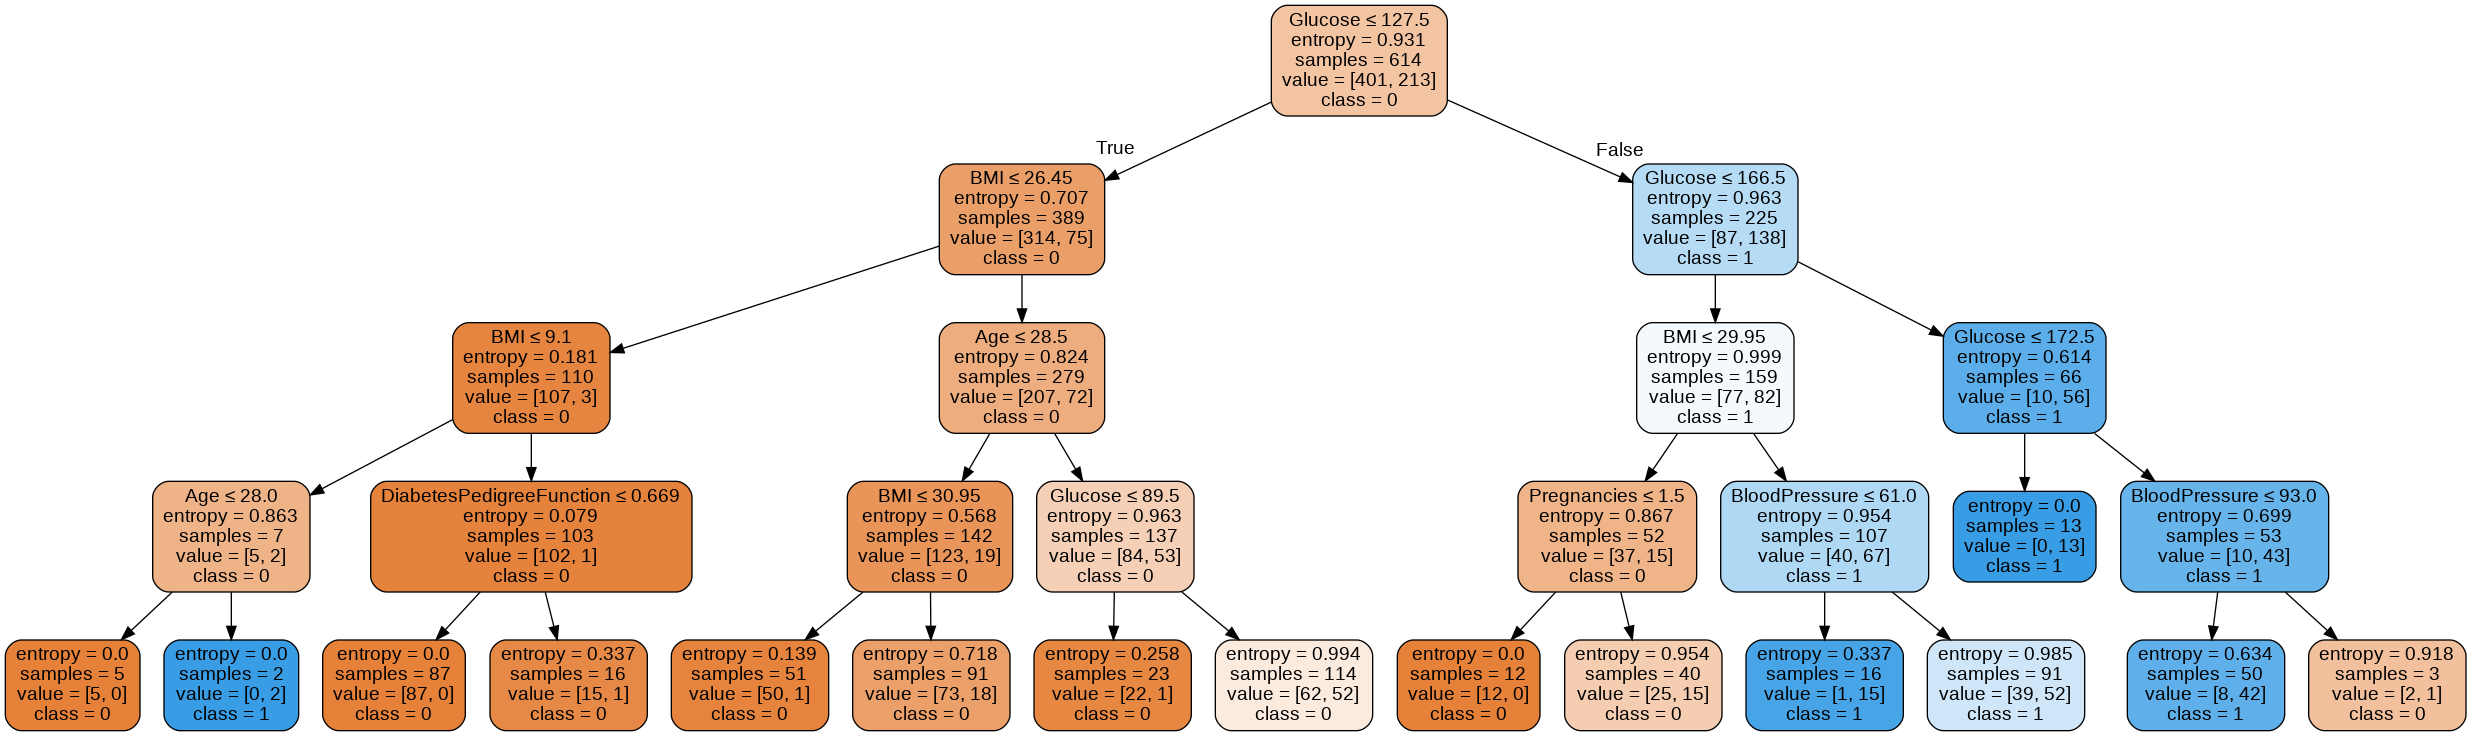

In [ ]:
# Visualisasi decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())